***I am so excited that we are going to perform Multiclass classification using Monkey dataset 🙊 with 10 different species***

In [8]:
# Let us fix the initial path for the dataset
train_dir = "/kaggle/input/whymonkeys/Monkey Species Data/Training"
valid_dir = "/kaggle/input/whymonkeys/Monkey Species Data/Validation"

In [9]:
# Now let us find the class names of the monkeys
import pathlib, numpy as np

class_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in class_dir.glob('*')]))

***Now we are going to preprocess the dataset as per our wish🧝‍♂️***

In [10]:
# Using ImageDataGenerator we are develop a pre-processing variable
from tensorflow.keras.preprocessing.image import ImageDataGenerator
modifier = ImageDataGenerator(rescale = 1/255.0 , horizontal_flip = True , vertical_flip = True)

In [11]:
# Now applying the above modifier to the Dataset

train_data = modifier.flow_from_directory(directory = train_dir,
                                          target_size = (224,224),
                                          color_mode = "rgb",
                                          shuffle = True,
                                          batch_size = 32,
                                          class_mode = "categorical")

valid_data = modifier.flow_from_directory(directory = valid_dir,
                                          target_size = (224,224),
                                          color_mode = "rgb",
                                          shuffle = True,
                                          batch_size = 32,
                                          class_mode = "categorical")

Found 10000 images belonging to 10 classes.
Found 1306 images belonging to 10 classes.


***Now Before creating the model for Monkey🙊 classification let us visualize our monkeys 😂***

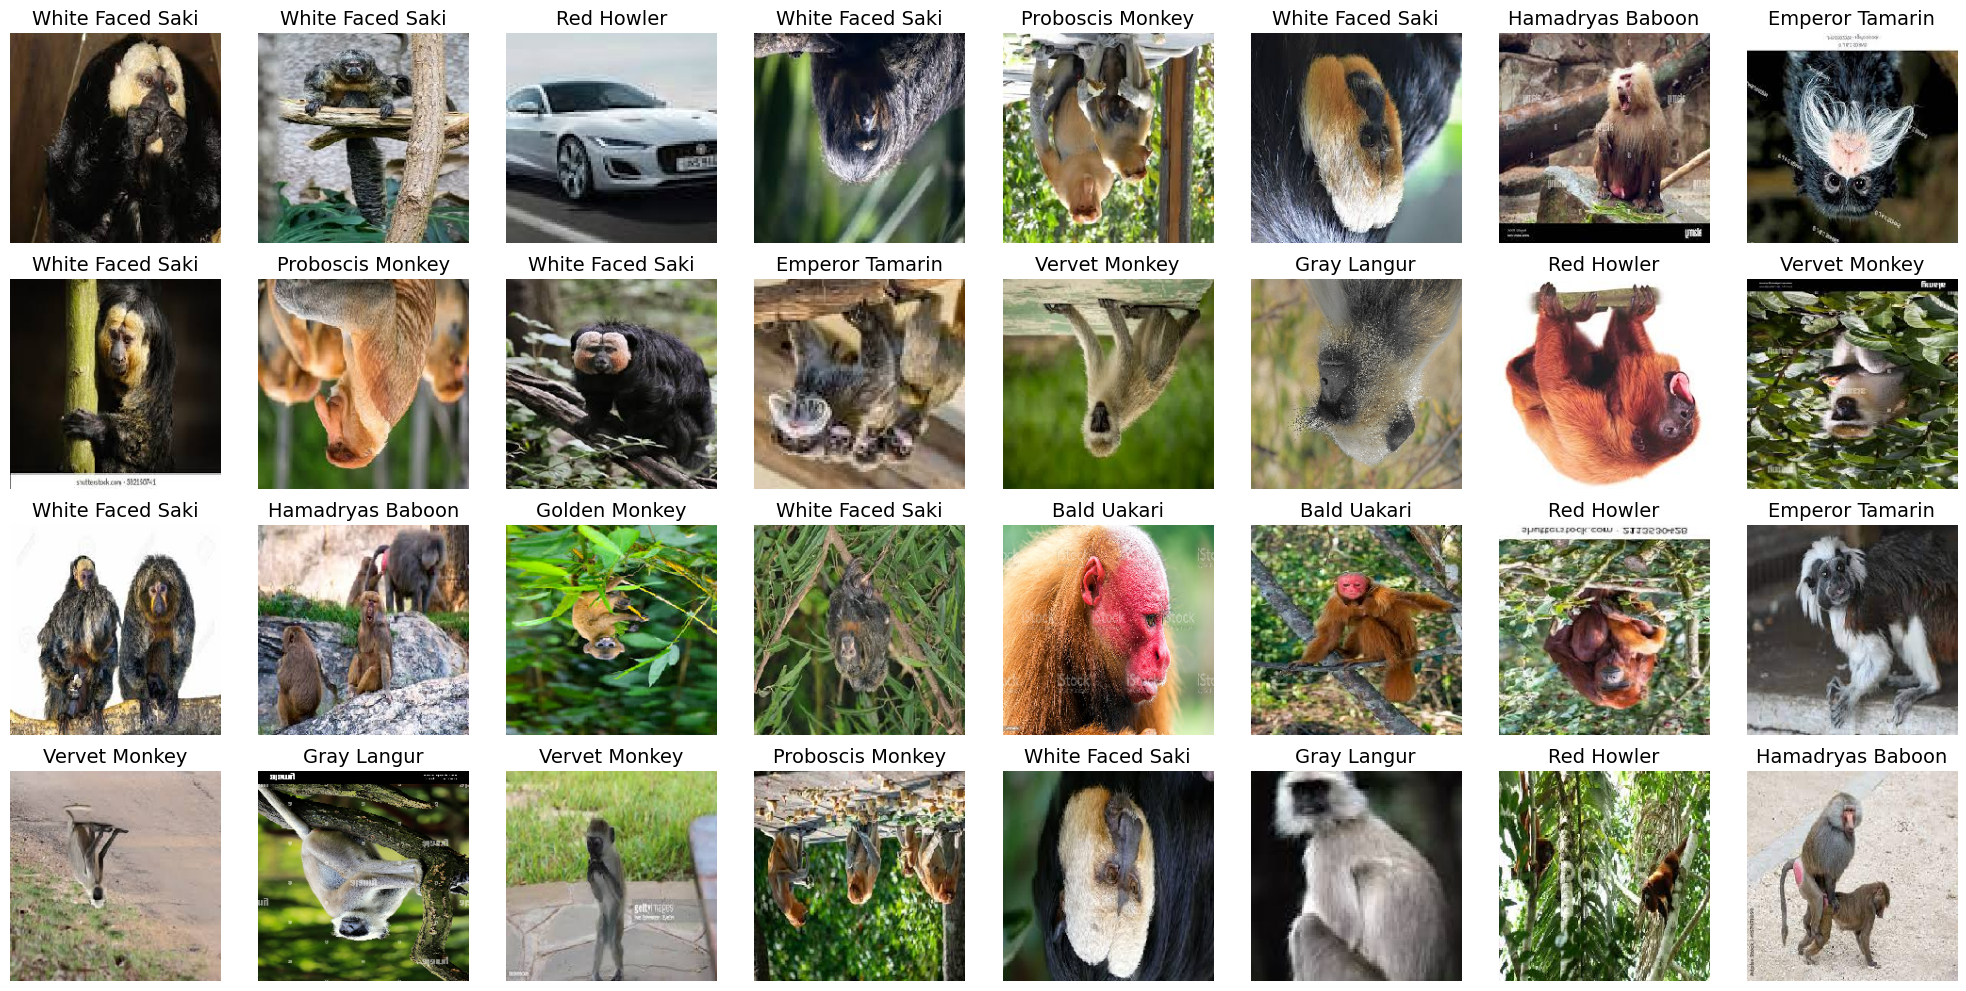

In [12]:
# It is an optionl step you can either implement else you can skip it.

import matplotlib.pyplot as plt
import numpy as np
import pathlib

images, labels = next(valid_data)  
batch_size = images.shape[0]

# Handle one-hot labels or class indices
if len(labels.shape) > 1 and labels.shape[1] == 10:  # one-hot encoded
    label_indices = np.argmax(labels, axis=1)
else:
    label_indices = labels  

rows = 4
cols = (batch_size // rows) if batch_size % rows == 0 else (batch_size // rows + 1)

plt.figure(figsize=(20, 10))
for i in range(batch_size):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[int(label_indices[i])], fontsize=14)
    plt.axis("off")
plt.tight_layout()
plt.show()

 ***Now let us Build the model for monkey classification 🙊***

In [13]:
# Step - 1. Creation of the architecture

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Flatten , MaxPool2D , Dense

Monkey_Classifier1 = Sequential([
    Conv2D(64, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(64, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(64, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(64, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(128, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(128, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

# Step - 2. Build the Model 

Monkey_Classifier1.compile(loss = "categorical_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                           metrics = ["accuracy"])

# Here without considering about the optimal learning rate let us move for Train the model

History1 = Monkey_Classifier1.fit(train_data,
                                  epochs = 100,
                                  steps_per_epoch = len(train_data),
                                  validation_data = valid_data,
                                  validation_steps = len(valid_data))

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 148ms/step - accuracy: 0.1763 - loss: 2.1909 - val_accuracy: 0.3078 - val_loss: 1.9412
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.3893 - loss: 1.7237 - val_accuracy: 0.4548 - val_loss: 1.6626
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.4739 - loss: 1.5087 - val_accuracy: 0.4908 - val_loss: 1.4986
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.5337 - loss: 1.3648 - val_accuracy: 0.5100 - val_loss: 1.4514
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.5612 - loss: 1.2901 - val_accuracy: 0.5337 - val_loss: 1.3473
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.5997 - loss: 1.1841 - val_accuracy: 0.5666 - val_loss: 1.2449
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.6240 - loss: 1.1315 - val_accuracy: 0.6309 - val_loss: 1.1053
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.6440 - loss: 

***In the above cell we've seen how the model took more amount of time for learning the model next we can evaluate the model***

In [22]:
Monkey_Classifier1.evaluate(valid_data)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.7726 - loss: 1.1736


[1.2191437482833862, 0.7710566520690918]

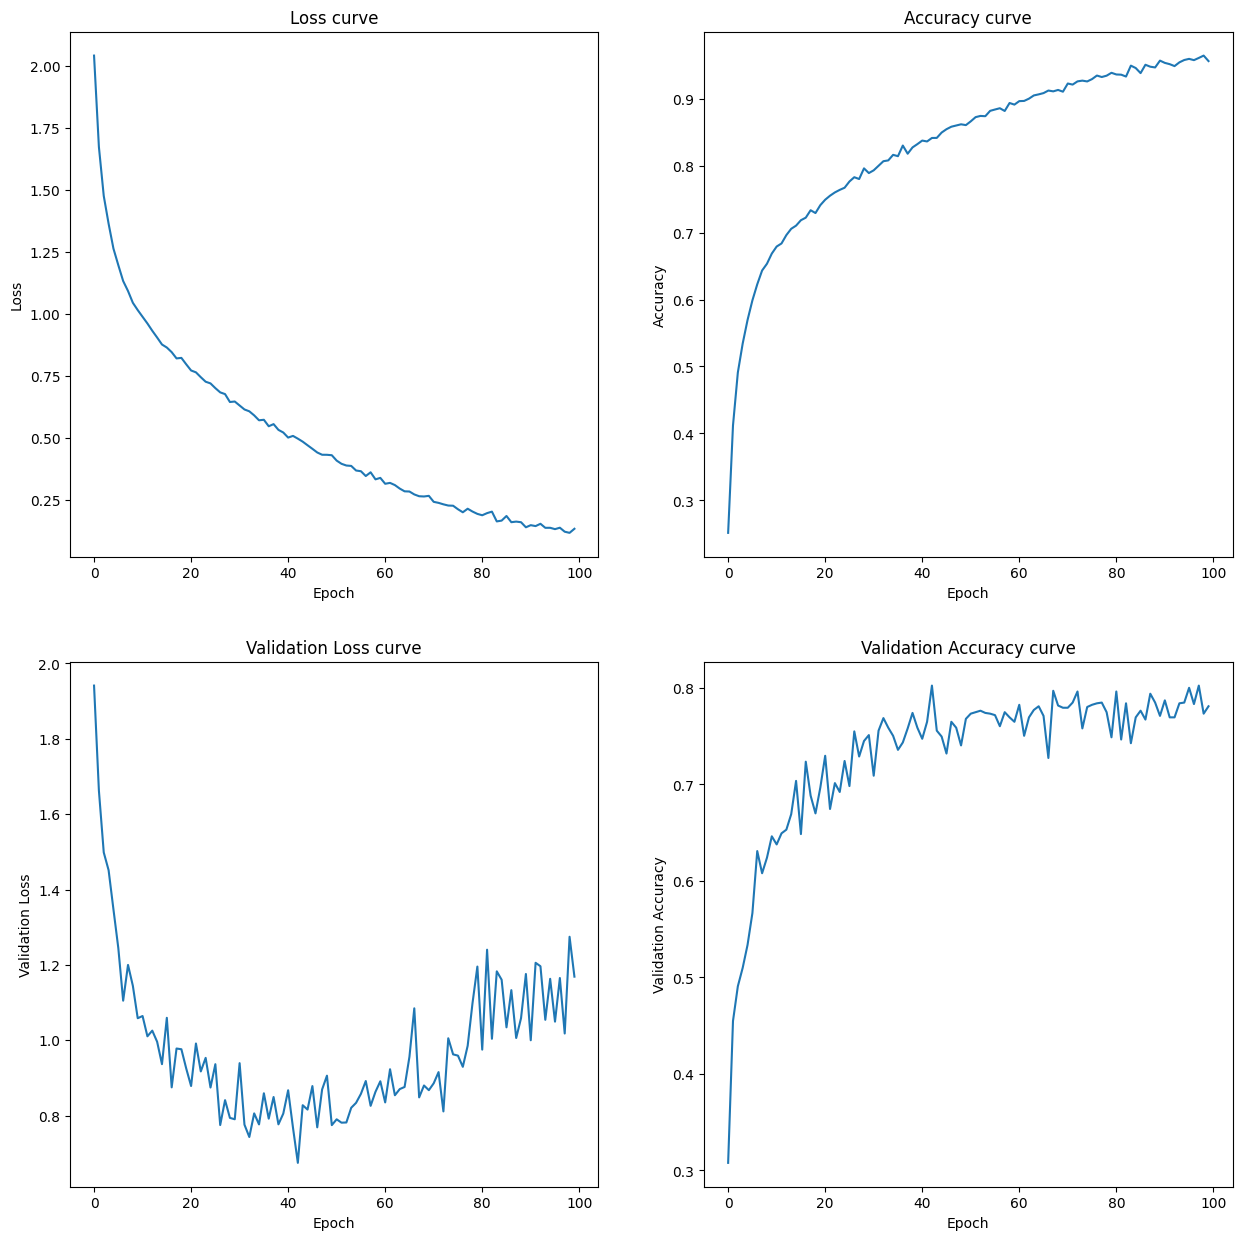

In [23]:
# Now let us plot the loss curves

import pandas as pd
values = pd.DataFrame(History1.history)

plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
plt.title("Loss curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
values['loss'].plot()
plt.subplot(2,2,2)
plt.title("Accuracy curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
values['accuracy'].plot()
plt.subplot(2,2,3)
plt.title("Validation Loss curve")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
values['val_loss'].plot()
plt.subplot(2,2,4)
plt.title("Validation Accuracy curve")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
values['val_accuracy'].plot()
plt.show()

***We got good loss and accuracy curve but we still need to make some changes in the model or in the hyperparameters to avoid overfitting(due to validation curve glitches). Now let us look into the summary of the model***

In [24]:
Monkey_Classifier1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 3, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,005,920 (3.84 MB)

 Trainable params: 335,306 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 670,614 (2.56 MB)

In [26]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

def pred_plot_batch(model, data, target_size, class_names):
    images, labels = next(data) 
    batch_size = images.shape[0]
    rows = 4
    cols = (batch_size // rows) if (batch_size % rows == 0) else (batch_size // rows + 1)
    plt.figure(figsize=(15,10))

    for i in range(batch_size):
        img_resized = tf.image.resize(images[i], (target_size, target_size)) / 255.0
        img_expanded = tf.expand_dims(img_resized, axis=0) 

        pred_probs = model.predict(img_expanded, verbose=0)
        pred_class_idx = np.argmax(pred_probs)  
        actual_class_idx = np.argmax(labels[i])   

        pred_class = class_names[pred_class_idx]
        actual_class = class_names[actual_class_idx]

        plt.subplot(rows, cols, i + 1)
        display_img = images[i]
        if display_img.max() > 1.0:
            display_img = display_img / 255.0
        plt.imshow(display_img)
        plt.title(f"P: {pred_class}\nA: {actual_class}",
                  color='green' if pred_class == actual_class else 'red',
                  fontsize=10)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


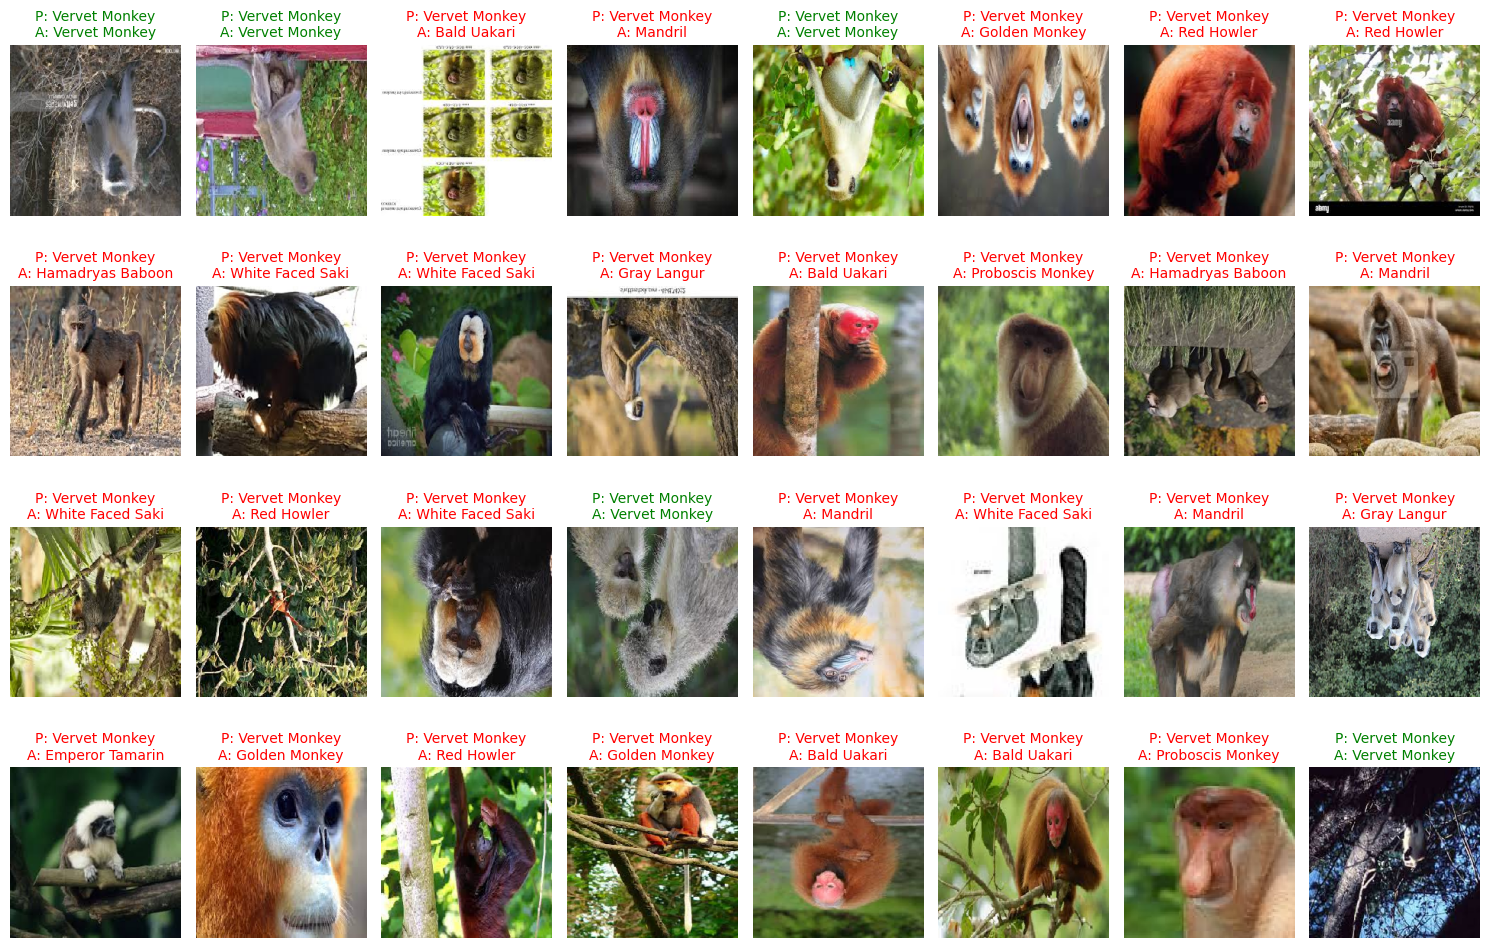

In [27]:
class_names = list(valid_data.class_indices.keys())
pred_plot_batch(model = Monkey_Classifier1 , data = train_data , target_size = 224 , class_names = class_names)

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step


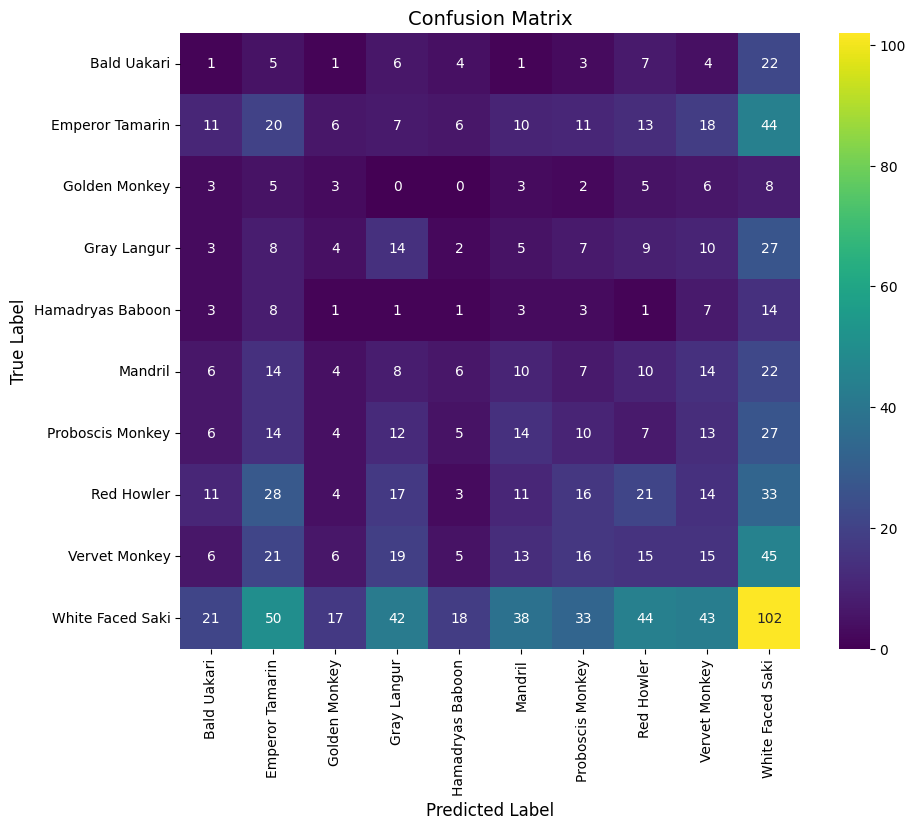

Accuracy:  0.1508
Precision: 0.1632
Recall:    0.1508
F1 Score:  0.1557


In [28]:
# let us plot the confusion matrix and calculate the necessary metrics

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Predict probabilities on validation data
y_pred_probs = Monkey_Classifier1.predict(valid_data)

# Convert predicted probabilities to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true labels from valid_data
# If valid_data provides one-hot labels, convert them to indices
if hasattr(valid_data, 'labels'):
    y_true = valid_data.labels
elif hasattr(valid_data, 'classes'):
    y_true = valid_data.classes
else:
    # If labels are one-hot encoded arrays
    labels_batch = []
    for _, labels in valid_data:
        labels_batch.extend(np.argmax(labels, axis=1))
    y_true = np.array(labels_batch[:len(y_pred)])  # ensure matching length

# Get class names as list (to preserve order)
class_names = list(valid_data.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Calculate metrics with multi-class averaging
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")


In [29]:
# now let us save the weights

Monkey_Classifier1.save('Monkey_classifier.keras')  # entire model
Monkey_Classifier1.save_weights('Monkey_classifier_weights.weights.h5')  # only weights